<a href="https://colab.research.google.com/github/Saharuth/MachineLearning/blob/main/MNIST/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris Dataset

##Linear SVM

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

In [3]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [4]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

###Linear SVC

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired_r')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

clf_linSVC = Pipeline([
    ("linear_svc", LinearSVC(C=200, loss="hinge", max_iter=100000))
])

clf_linSVC.fit(X_train, y_train)

print("Train set accuracy = " + str(clf_linSVC.score(X_train, y_train)))
print("Test set accuracy = " + str(clf_linSVC.score(X_test, y_test)))

Train set accuracy = 0.9464285714285714
Test set accuracy = 0.9736842105263158


In [ ]:
import pandas as pd
import seaborn as sns

df_iris = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df_iris['target_names'] = iris["target"]
sns.pairplot(df_iris, hue="target_names", diag_kind="hist")

In [ ]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y, cmap='Paired_r'):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

plot_decision_boundary(clf_linSVC, X, y)

###Gaussian RBF Kernel

In [12]:
clf_SVC = Pipeline([
    ("linear_svc", SVC(kernel="rbf", gamma=2, C=10, max_iter=10000))
])

# Train the model
clf_SVC.fit(X_train, y_train)

# Evaluate the model's accuracy
print("Train set accuracy = " + str(clf_SVC.score(X_train, y_train)))
print("Test set accuracy = " + str(clf_SVC.score(X_test, y_test)))

Train set accuracy = 0.9553571428571429
Test set accuracy = 1.0


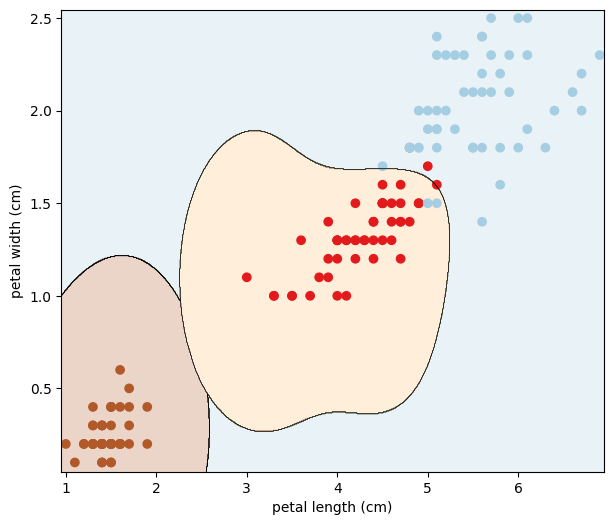

In [13]:
plot_decision_boundary(clf_SVC, X, y)

##Polynomial Features

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)